## Shark attacks

In [131]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [132]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [133]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [134]:
sharks

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [135]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [136]:
sharks['number_age'] = pd.to_numeric(sharks['Age'], errors='coerce')

In [137]:
sharks.count()

Case Number               8597
Date                      6104
Year                      6102
Type                      6100
Country                   6058
Area                      5690
Location                  5592
Activity                  5569
Name                      5897
Sex                       5526
Age                       3380
Injury                    6076
Fatal (Y/N)               5980
Time                      2854
Species                   3103
Investigator or Source    6088
pdf                       6104
href formula              6102
href                      6103
Case Number.1             6104
Case Number.2             6104
original order            6104
Unnamed: 22                  1
Unnamed: 23                  2
number_age                3276
dtype: int64

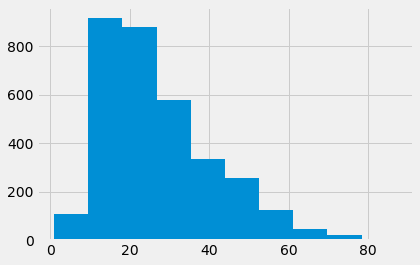

In [138]:
# if I have had Soma's amazing command (pd.to_numeric(sharks['Age'], errors='coerce'), I would have never practiced to much reg ex
sharks['number_age'].hist()

In [139]:
sharks['number_age']


0        46.0
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6        14.0
7        34.0
8        82.0
9         NaN
10       48.0
11        NaN
12       19.0
13       30.0
14        NaN
15       32.0
16       20.0
17        NaN
18       73.0
19       41.0
20       29.0
21       33.0
22       18.0
23        NaN
24       14.0
25       33.0
26       28.0
27        NaN
28        NaN
29       40.0
30        NaN
31        NaN
32       17.0
33       28.0
34       17.0
35        NaN
36       68.0
37       35.0
38       10.0
39       21.0
40       16.0
41       51.0
42       39.0
43       17.0
44       58.0
45       30.0
46        NaN
47       58.0
48        NaN
49        NaN
50       26.0
51       26.0
52       22.0
53        NaN
54        NaN
55        NaN
56       37.0
57        NaN
58       55.0
59       57.0
60        NaN
61       48.0
62       35.0
63       47.0
64       20.0
65       16.0
66        NaN
67       55.0
68       61.0
69       19.0
70       36.0
71    

In [140]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [141]:
sharks['Year'].describe()

count    6102.000000
mean     1926.346444
std       284.157124
min         0.000000
25%      1942.000000
50%      1976.000000
75%      2004.000000
max      2018.000000
Name: Year, dtype: float64

In [142]:
sharks.rename(columns={"Sex ": "Sex"}, inplace=True)

In [143]:
sharks["Sex"].value_counts().head()

M      4911
F       610
M         2
.         1
lli       1
Name: Sex, dtype: int64

In [144]:
sharks["Sex"].value_counts(dropna=False)

NaN    20091
M       4911
F        610
M          2
.          1
lli        1
N          1
Name: Sex, dtype: int64

In [145]:
sharks.dropna(subset=["Sex"], inplace=True)

In [146]:
sharks["Sex"].unique()

array(['M', 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [147]:
sharks = sharks[sharks["Sex"].isin(["M","F"])]

In [148]:
sharks["Sex"].head()

0    M
1    F
3    M
4    F
5    M
Name: Sex, dtype: object

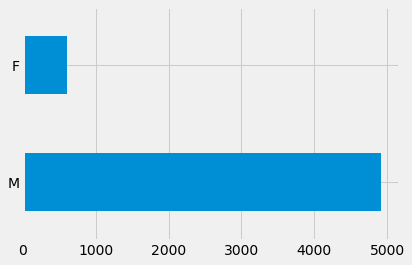

In [149]:
sharks["Sex"].value_counts().plot(kind='barh')

In [150]:
sharks["Country"].value_counts().head()

USA                 2060
AUSTRALIA           1158
SOUTH AFRICA         507
PAPUA NEW GUINEA     114
NEW ZEALAND          111
Name: Country, dtype: int64

In [151]:
sharks["Fatal (Y/N)"].value_counts()

N                 4019
Y                 1419
 N                   8
2017                 1
--M524--M3133Y       1
Name: Fatal (Y/N), dtype: int64

In [152]:
sharks.groupby(["Country", "Fatal (Y/N)"]).sum()

Year  number_age
Country                               Fatal (Y/N)                          
 PHILIPPINES                          Y                  1944.0         NaN
 TONGA                                N                  2000.0        69.0
                                      Y                  4008.0         NaN
ADMIRALTY ISLANDS                     N                  1962.0        26.0
ALGERIA                               Y                  1844.0         NaN
AMERICAN SAMOA                        Y                  5867.0        77.0
ANDAMAN / NICOBAR ISLANDAS            Y                  1958.0        32.0
ANGOLA                                N                  1993.0         NaN
ANTIGUA                               N                  2011.0         NaN
ARGENTINA                             N                  1954.0        18.0
ARUBA                                 Y                  2015.0        58.0
ASIA?                                 N                     0.0         NaN
ATLANTIC OCEAN                        N                  9876.0         NaN
                                      Y                 11466.0        47.0
AUSTRALIA                              N                11760.0       166.0
                                      N               1568622.0     12762.0
                                      Y                625482.0      5669.0
AZORES                                N                  5891.0        49.0
BAHAMAS                               N                169472.0      2215.0
                                      Y                 23393.0       202.0
BAHREIN                               Y                     0.0         NaN
BARBADOS                              N                  3598.0        19.0
                                      Y                  5408.0        16.0
BAY OF BENGAL                         Y                  1942.0         NaN
BELIZE                                N                  2013.0         NaN
                                      Y                  2006.0        50.0
BERMUDA                               N                 15645.0       113.0
                                      Y                  1959.0        29.0
BRAZIL                                N                107890.0       820.0
                                      Y                 67806.0       481.0
BRITISH ISLES                         N                  1971.0        32.0
BRITISH NEW GUINEA                    N                  1890.0        18.0
BRITISH VIRGIN ISLANDS                Y                  2007.0        53.0
BRITISH WEST INDIES                   N                  1962.0        24.0
BURMA                                 N                     0.0         NaN
                                      Y                  3788.0         NaN
Between PORTUGAL & INDIA              Y                  1580.0         NaN
CANADA                                N                 11696.0        53.0
                                      Y                  3779.0         NaN
CAPE VERDE                            N                  2016.0        60.0
                                      Y                  3861.0        27.0
CARIBBEAN SEA                         N                  3953.0         NaN
                                      Y                  5714.0         NaN
CAYMAN ISLANDS                        N                  4030.0        65.0
CENTRAL PACIFIC                       N                  1943.0        26.0
                                      Y                  1943.0         NaN
CEYLON (SRI LANKA)                    Y                     0.0        15.0
CHILE                                 N                  7981.0        19.0
                                      Y                  7865.0         NaN
CHINA                                 N                  5928.0        96.0
                                      Y                  5794.0         NaN
COLUMBIA                       

In [153]:
sharks["Year"].head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [154]:
sharks['Year'].replace('.0', '').head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [155]:
sharks["Year"].head().astype(int)

0    2017
1    2017
3    2017
4    2017
5    2017
Name: Year, dtype: int64

In [156]:
sharks.tail()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,number_age
6099,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,NaN
6100,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,NaN
6101,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,NaN
6102,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,NaN
6103,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,15.0


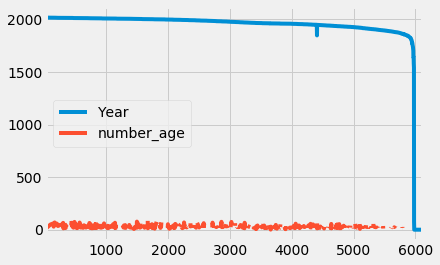

In [157]:
sharks[sharks["Fatal (Y/N)"] == "Y"].plot()

In [158]:
df_fatal= sharks[sharks["Fatal (Y/N)"] == "Y"]

In [159]:
df_fatal

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,number_age
21,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,33,FATAL,Y,17h00,NaN,33.0
26,29-Apr-2017,2017.0,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,Adrien Dubosc,M,28,FATAL,Y,11h15,NaN,28.0
32,17-Apr-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Kelpies near Wylie Bay,Surfing,Laeticia Brouwer,F,17,FATAL,Y,16h00,White shark,17.0
50,21-Feb-2017,2017.0,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,Alexandre Naussance,M,26,Fatal,Y,09h30,NaN,26.0
96,06-Sep-2016,2016.0,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,50.0
142,05-Jun-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,Mindarie,Diving,Doreen Collyer,F,60,FATAL,Y,11h30,3+ m shark,60.0
146,31-May-2016,2016.0,Unprovoked,AUSTRALIA,Western Australia,"Falcon Beach, Mandurah",Surfing,Ben Gerring,M,29,FATAL,Y,16h00,White shark,29.0
162,09-Apr-2016,2016.0,Unprovoked,NEW CALEDONIA,Grand Terre,Poe Beach,Walking,Nicole Malignon,F,69,FATAL,Y,10h45,"Tiger shark, 2.5 m",69.0
173,10-Mar-2016,2016.0,Unprovoked,Fiji,Vanua Levu,NaN,Diving for beche-de-mer,Maika Tabua,M,45,FATAL,Y,Afternoon,NaN,45.0
198,19-Dec-2015,2015.0,Unprovoked,ARUBA,NaN,Boat capsized,Sea disaster,Adrian Esteban Rafael,M,58,FATAL,Y,NaN,NaN,58.0


In [160]:
df_nonfatal = sharks[sharks["Fatal (Y/N)"] == "N"]
df_nonfatal['Fatal (Y/N)'].value_counts()

N    4019
Name: Fatal (Y/N), dtype: int64

In [161]:
pd.set_option('display.max_columns', 100)

In [162]:
pd.set_option('display.max_rows', 100)

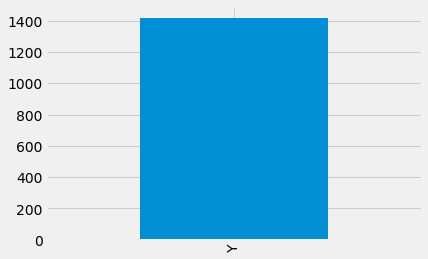

In [163]:
df_fatal['Fatal (Y/N)'].value_counts().plot(kind='bar')

In [164]:
attack = sharks.groupby(['Year','Fatal (Y/N)'])['Area'].count().to_frame().reset_index()

In [165]:
attack[attack['Fatal (Y/N)'] == 'Y'] 

,Year,Fatal (Y/N),Area
1,0.0,Y,42
3,77.0,Y,1
4,1543.0,Y,1
5,1580.0,Y,0
6,1642.0,Y,1
8,1700.0,Y,0
10,1721.0,Y,1
11,1738.0,Y,1
12,1742.0,Y,0
13,1748.0,Y,1


In [166]:
attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

In [167]:
sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,number_age
0,09-Jul-2017,2017.0,Unprovoked,USA,Florida,"Haulover Beach, Miami-Dade County",Swimming,Elvin Lanza,M,46,Lower legs bitten,N,15h30,"Bull shark, 4' to 5'",46.0
1,07-Jul-2017,2017.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,Teen,"No injury, shark bit surfboard",N,15h00,"White shark, 2.5 m",NaN
3,29-Jun-2017,2017.0,Invalid,USA,South Carolina,Wrightsville Beach,Fishing,male,M,NaN,"Arm injured by hook, not by a shark",N,19h30,NaN,NaN
4,Reported 29-Jun-2017,2017.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Olivia Wallhauser,F,Teen,Left foot bitten,N,NaN,NaN,NaN
5,19-Jun-2017,2017.0,Unprovoked,USA,Florida,"Singer Island, Palm Beach County",Surfing,male,M,NaN,1 to 2-inch laceration behind knee,N,Morning,NaN,NaN
6,18-Jun-2017,2018.0,Unprovoked,USA,South Carolina,Hilton Head,Swimming,Regan Readnour,F,14,Leg bitten,N,NaN,"Bull shark, 4' to 5'",14.0
7,18-Jun-2017,2018.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,"Bull shark, 2m",34.0
8,17-Jun-2017,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa d’en Bossa,Swimming,male,M,82,2-inch laceration to hand,N,12h00,NaN,82.0
9,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Feeding sharks,Carly,F,NaN,Fingernail pulled off,N,NaN,NaN,NaN
10,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m",48.0


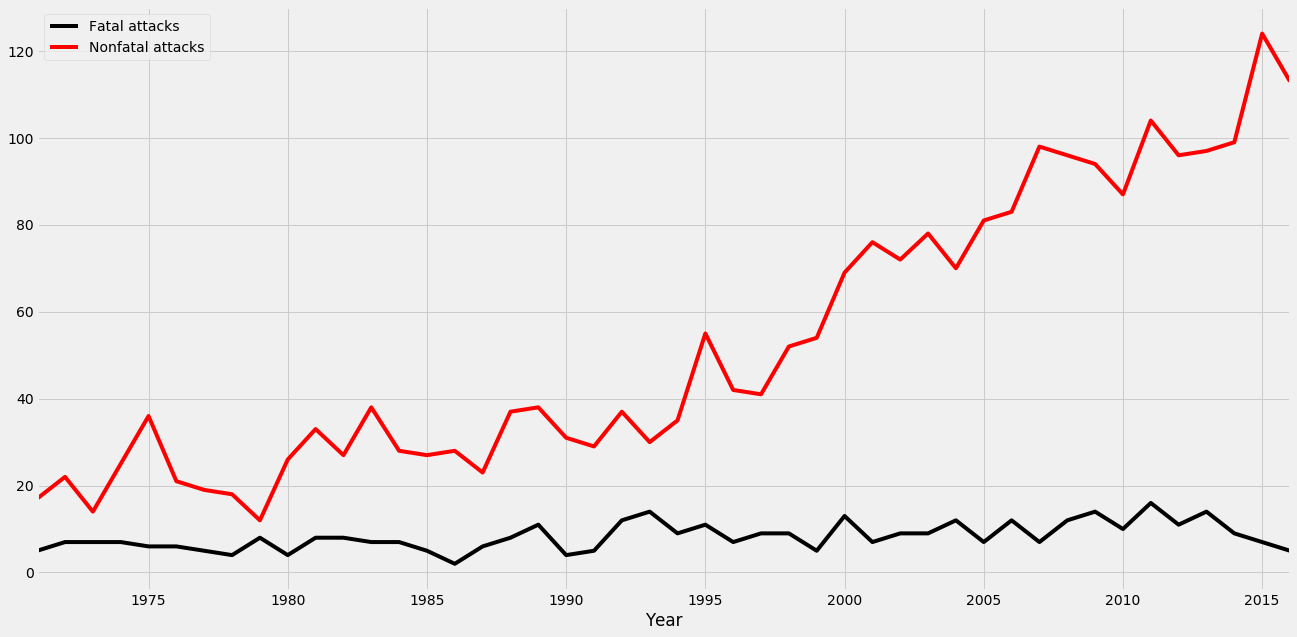

In [168]:
ax = attack[attack['Fatal (Y/N)'] == 'Y'].plot(kind='line', color='black', x='Year', y='Area', figsize=(20,10), label='Fatal attacks') 
attack[attack['Fatal (Y/N)'] == 'N'].plot(kind='line', color='red', x='Year', y='Area', figsize=(20,10), ax=ax, label='Nonfatal attacks')
plt.savefig("fatalattacks.pdf")

In [169]:
sharks['Activity'].value_counts()

Surfing                                                                                                                   906
Swimming                                                                                                                  811
Fishing                                                                                                                   323
Spearfishing                                                                                                              308
Bathing                                                                                                                   149
Wading                                                                                                                    144
Diving                                                                                                                    107
Standing                                                                                                              

In [170]:
swimming = sharks[(sharks["Activity"] == "Swimming") & (sharks['Fatal (Y/N)'] == 'N')]
surfing = sharks[(sharks["Activity"] == "Surfing") & (sharks['Fatal (Y/N)'] == 'N')]
fishing = sharks[(sharks["Activity"] == "Fishing") & (sharks['Fatal (Y/N)'] == 'N')]
wading = sharks[(sharks["Activity"] == "Wading") & (sharks['Fatal (Y/N)'] == 'N')]

In [171]:
swim_counts_fatal = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_fatal = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_fatal = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_fatal = wading["Year"].value_counts().to_frame().reset_index()

In [172]:
swim_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_fatal.sort_values(by="Year_",inplace=True)
surf_counts_fatal.sort_values(by="Year_",inplace=True)
fish_counts_fatal.sort_values(by="Year_",inplace=True)
wade_counts_fatal.sort_values(by="Year_",inplace=True)

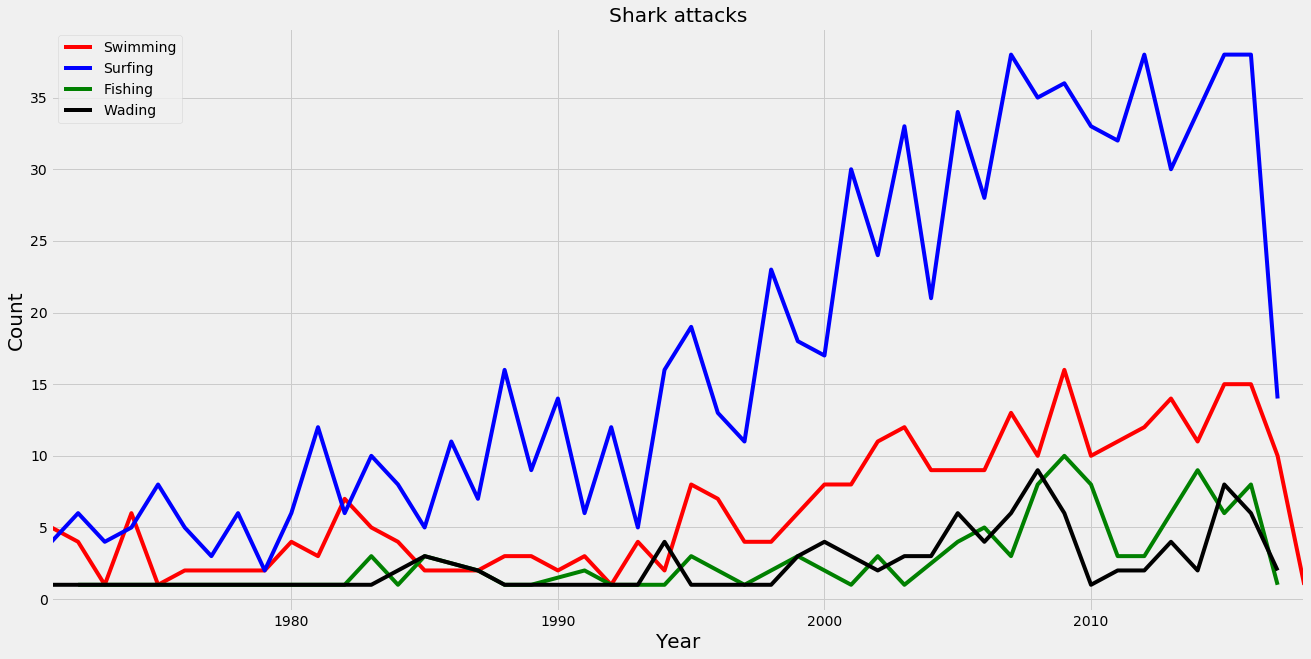

In [173]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.savefig("activities.pdf")

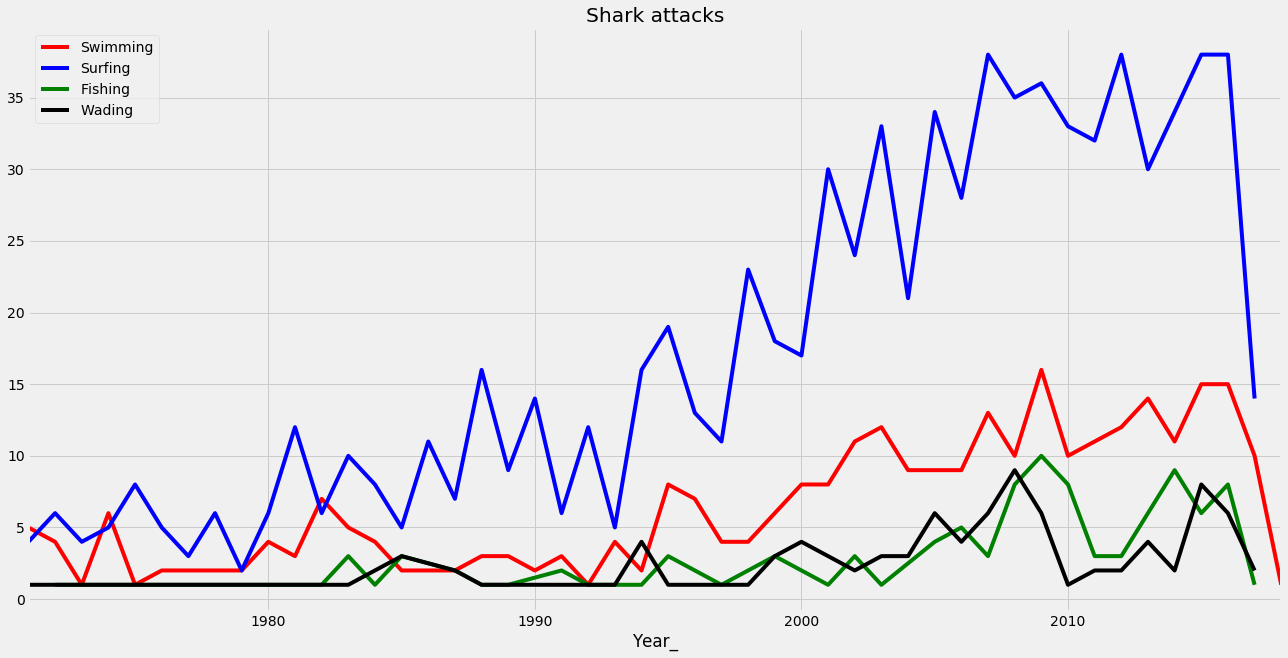

In [176]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
#plt.ylabel('Count', fontsize=20)
#plt.xlabel('Year', fontsize=20)
#plt.savefig("neu_activities.pdf")

In [182]:
# all attacks, not only fatal ones
swimming = sharks[(sharks["Activity"] == "Swimming")]
surfing = sharks[(sharks["Activity"] == "Surfing")]
fishing = sharks[(sharks["Activity"] == "Fishing")]
wading = sharks[(sharks["Activity"] == "Wading")]

In [183]:
swim_counts_all = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_all = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_all = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_all = wading["Year"].value_counts().to_frame().reset_index()

In [184]:
swim_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_all.sort_values(by="Year_",inplace=True)
surf_counts_all.sort_values(by="Year_",inplace=True)
fish_counts_all.sort_values(by="Year_",inplace=True)
wade_counts_all.sort_values(by="Year_",inplace=True)

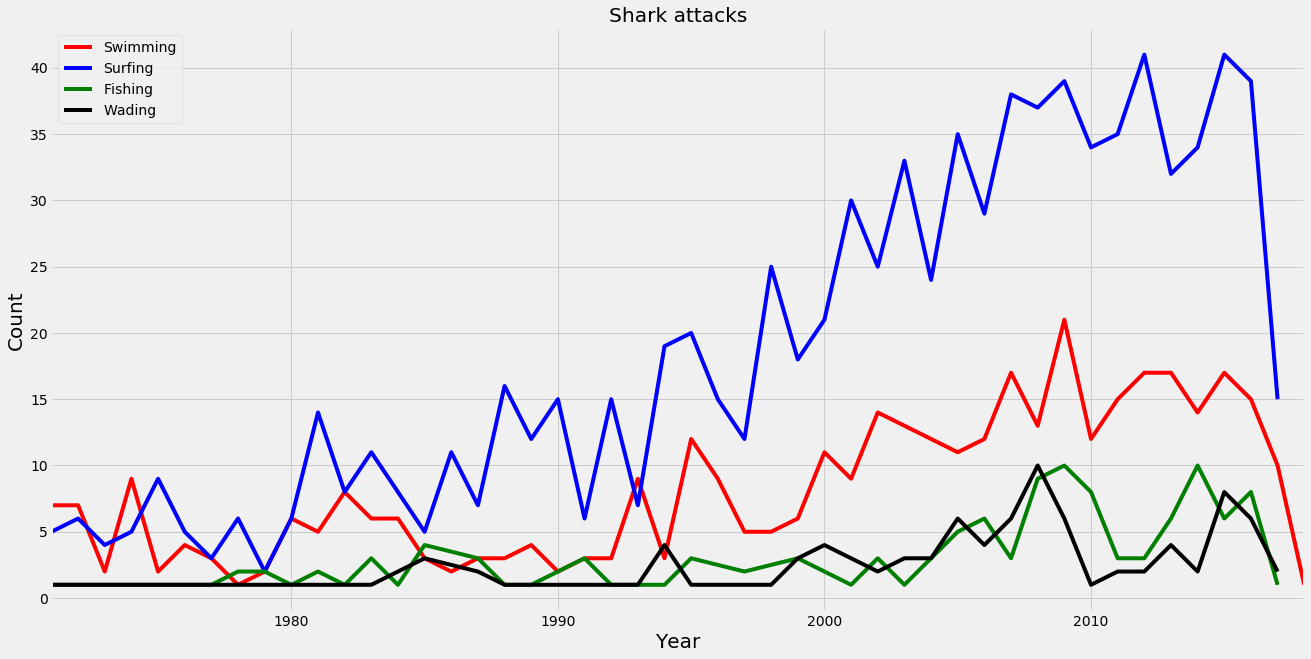

In [185]:
ax = swim_counts_all[swim_counts_all["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_all[surf_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_all[fish_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_all[wade_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.savefig("neu_activities.pdf")

In [186]:
swim_counts_all

,Year_,Cases
13,0.0,12
164,1555.0,1
168,1703.0,1
137,1721.0,1
147,1738.0,1
153,1742.0,1
160,1749.0,1
138,1751.0,1
156,1764.0,1
159,1774.0,1


In [ ]:
sharks.groupby("Activity")["Sex"].value_counts()

In [ ]:
swimming2 = sharks[(sharks["Activity"] == "Swimming") | (sharks['Fatal (Y/N)'] == 'N')]
surfing2 = sharks[(sharks["Activity"] == "Surfing") | (sharks['Fatal (Y/N)'] == 'N')]
fishing2 = sharks[(sharks["Activity"] == "Fishing") | (sharks['Fatal (Y/N)'] == 'N')]
wading2 = sharks[(sharks["Activity"] == "Wading") | (sharks['Fatal (Y/N)'] == 'N')]

In [ ]:
swim2_counts_fatal = swimming["Sex"].value_counts().to_frame().reset_index()
surf2_counts_fatal = surfing["Sex"].value_counts().to_frame().reset_index()
fish2_counts_fatal = fishing["Sex"].value_counts().to_frame().reset_index()
wade2_counts_fatal = wading["Sex"].value_counts().to_frame().reset_index()

In [ ]:
male_swimming = swimming[swimming["Sex"] == "M"]
female_swimming = swimming[swimming["Sex"] == "F"]
male_surfing = surfing[surfing["Sex"] == "M"]
female_surfing= surfing[surfing["Sex"] == "M"]
male_fishing = fishing[fishing["Sex"] == "M"]
female_fishing = fishing[fishing["Sex"] == "M"]

In [ ]:
interested = sharks[sharks.Activity.isin(['Swimming', 'Surfing','Wading', 'Fishing'])]
interested.groupby('Activity')['Sex'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.savefig("gender.pdf")

In [ ]:
sharks['Age']                                 

In [ ]:
sharks.dropna(subset=['Age'], inplace=True)

In [ ]:
sharks['Age']
sharks.Age.replace('2½', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('^ ', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('>', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('9 months', '1',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('6½', '7',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('mid-30s', '35',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('(adult)', '30',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('or 20', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('Teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('young', '20',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('Elderly', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('mid-s ', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('s', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(' or', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(' &', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(' to', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('Both', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(' ?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(',,,,?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('X', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('A.M.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('F', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('mid-', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('"\w"', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('"middle-age"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace(',+', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('"\d+"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('month', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('Ca.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('[?]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('[()]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('\'', '',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('13 or 14', '13',inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']
sharks.Age.replace('(\d\d\d)', '', inplace=True, regex=True)
sharks['Age'].value_counts()

In [ ]:
sharks['Age']

In [ ]:
#sharks['Age']
#sharks.Age.replace('1314', '',inplace=True, regex=True)
#sharks['Age'].value_counts()

In [ ]:
#sharks['Age'].astype(str)#.astype(int)

In [ ]:
sharks['Fatal (Y/N)']

In [ ]:
sharks.dropna(subset=['Fatal (Y/N)'], inplace=True)

In [ ]:
sharks.dropna(subset=['Age'], inplace=True)

In [ ]:
#sharks['Age'] == sharks[['Age']([sharks['Age']]<100)]
#attack = attack[(attack["Year"]>1970)]

In [ ]:
age_injuries = sharks.groupby('Age')['Area'].count().sort_values().to_frame()

In [ ]:
age_injuries = age_injuries.reset_index()
age_injuries.dtypes

In [ ]:
age_injuries

In [ ]:
age_injuries = age_injuries[age_injuries['Age'].notnull()]

In [ ]:
age_injuries.drop(age_injuries.index[74], inplace=True)

In [ ]:
age_injuries.drop(age_injuries.index[76], inplace=True)

In [ ]:
#age_injuries = age_injuries[(age_injuries['Age']<100)]
#attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

In [ ]:
age_injuries.plot(kind='bar', x='Age', figsize=(20,10), xlim=(0-100))

In [ ]:
sharks['Age']

In [ ]:
pd.set_option('display.max_rows', 3300)

In [ ]:
sharks['Age']

In [ ]:
sharks['number_age'].hist(color='blue', figsize=(10,10), bins=50, label='Age of the victims')
plt.savefig("age.pdf")

In [ ]:
sharks_surfing = sharks[sharks["Activity"] == 'Surfing']

In [ ]:
sharks_surfing.plot(kind='barh', ax=ax) #df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', ax=ax)

In [ ]:
surf = sharks[(sharks["Activity"] == "Surfing")]

In [ ]:
surf.groupby('Age')['Activity'].count().plot()

In [ ]:
surf['Age'].value_counts().hist()

In [ ]:
surf['number_age'].value_counts().mean()

In [ ]:
df_surf = sharks[sharks["Activity"] == "Surfing"]

In [ ]:
df_surf['number_age'].mean()